In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bisect import bisect_left
%matplotlib inline

In [2]:
def takeClosest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:        
        return before

In [3]:
slope_array = [2, 3, 4, 5, 6]
f_array = [0.02, 0.10, 0.20, 0.60]
v0_array = [0.5,1,2,5]
h0_array = [0.02, 0.05, 0.1, 0.5]
sB_array = np.linspace(0,15,500)
v_x = np.linspace(0,15,500)
g = 9.81
iterables = [slope_array, f_array, v0_array, h0_array, sB_array]
index = pd.MultiIndex.from_product(iterables, names=['slope', 'f', 'v0', 'h0','sB'])
df = pd.DataFrame(np.zeros((len(index.labels[0]),2)), index=index, columns=['vB','hB'])

In [4]:
for talud in slope_array:    
    print ('talud: 1/'+str(talud))
    beta = np.arctan(1/talud)
    
    for f in f_array:
        print ('friction coefficient:',f)
        
        for v0 in v0_array:
            print ('initial velocity',v0)            
            
            for h0 in h0_array:
                print ('initial layer thickness',h0)
                
                """
                start the iteration
                """
                # parameters                
                
                hB_array = []
                vB_array = []
                for s in sB_array:#[6:7]:
                    #print (s)
                    fv_y = []
                    #t39_array=[]
                    #t42_array=[]
                    for v in v_x:    
                        h = ((v0*h0)/v)    
                        k1 = np.sqrt((2*f*g*np.sin(beta))/h)    
                        k2 = np.arctanh(-((f*v0)/(h*k1))) 
                        #t_ = (2/k1)*(k2-np.arctanh(-((f*v)/(h*k1)))) # eq. 39
                        t = -v0/(g*np.sin(beta)) + np.sqrt((v**2/(g**2*(np.sin(beta))**2))+((2*s)/(g*np.sin(beta)))) # eq. 42
                        vout = -((k1*h)/f)*np.tanh(k2-((k1*t)/2)) # eq. 40
                        #vout = (v0+((k1*h)/f)*np.tanh((k1*t)/2)) / (1+((f*v0)/(h*k1))*np.tanh((k1*t)/2)) # eq. 41        
                        fv_y.append(v-vout)
                        
                        #t39_array.append(t_)
                        #t42_array.append(t)

                    fv0 = takeClosest(fv_y, 0)
                    vB = v_x[fv_y.index(fv0)]    
                    hB = v0*h0/vB # eq. 43
                    #print ('|',vB)
                    vB_array.append(vB)
                    hB_array.append(hB)
                """
                set DataFrame
                """
                df.loc[(talud,f,v0,h0),'hB'] = hB_array
                df.loc[(talud,f,v0,h0),'vB'] = vB_array
print ('done')

talud: 1/2
friction coefficient: 0.02
initial velocity 0.5
initial layer thickness 0.02


c:\python35\lib\site-packages\ipykernel\__main__.py:27: RuntimeWarning: divide by zero encountered in double_scalars
c:\python35\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars
c:\python35\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars


initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 1
initial layer thickness 0.02


c:\python35\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in arctanh


initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 2
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 5
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
friction coefficient: 0.1
initial velocity 0.5
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 1
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 2
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 5
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
friction coefficient: 0.2
initial velocity 0.5
initial layer thickness 0.02
initial layer

c:\python35\lib\site-packages\ipykernel\__main__.py:41: RuntimeWarning: divide by zero encountered in double_scalars


initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
talud: 1/6
friction coefficient: 0.02
initial velocity 0.5
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 1
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 2
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 5
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
friction coefficient: 0.1
initial velocity 0.5
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 1
initial layer thickness 0.02
initial layer thickness 0.05
initial layer thickness 0.1
initial layer thickness 0.5
initial velocity 2
initial layer thickness 0.02
i

In [6]:
# store dataframe on disk
#df.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder//dataframe_timeseries.csv')
#df.to_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//dataframe_timeseries.pickle')

# read dataframe from disk
df = pd.read_pickle(r'D:\Projects\Pr\3517.10\Werkfolder//dataframe_timeseries.pickle')

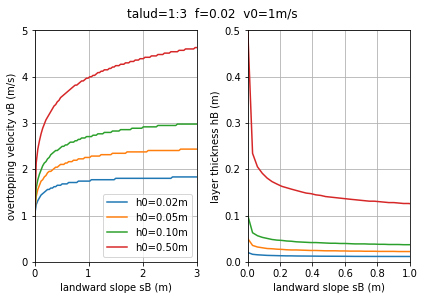

In [35]:
# FIGURE 15
talud = 3
f = 0.02
v0 = 1

fig, axes = plt.subplots(nrows=1, ncols=2)

df.loc[(talud,f,v0,0.02),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(talud,f,v0,0.05),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(talud,f,v0,0.1),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(talud,f,v0,0.5),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
axes[0].set_ylabel('overtopping velocity vB (m/s)')
axes[0].set_xlabel('landward slope sB (m)')
axes[0].set_xlim(0,3)
axes[0].set_ylim(0,5)
axes[0].grid(True)
axes[0].legend(["h0=0.02m", "h0=0.05m","h0=0.10m","h0=0.50m"]);
#plt.show()

df.loc[(talud,f,v0,0.02),'hB'].plot(ax=axes[1])
df.loc[(talud,f,v0,0.05),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
df.loc[(talud,f,v0,0.1),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
df.loc[(talud,f,v0,0.5),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
axes[1].set_ylabel('layer thickness hB (m)')
axes[1].set_xlabel('landward slope sB (m)')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,0.5)
axes[1].grid(True)

fig.suptitle('talud=1:'+str(talud)+'  f='+str(f)+'  v0='+str(v0)+'m/s', y=1.03, x=0.5)
#plt.show()
fig.tight_layout()
fig.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\plots\2017-07-07//FIG15_t-'+str(talud)+'_f-'+str(f)+'_v0-'+str(v0)+'.png', dpi=300, bbox_inches='tight' )

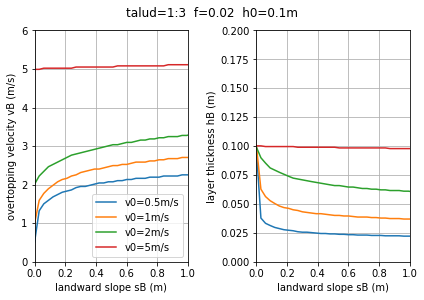

In [36]:
# FIGURE 16
talud = 3
f = 0.02
h0 = 0.1

fig, axes = plt.subplots(nrows=1, ncols=2)

df.loc[(talud,f,0.5,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(talud,f,1,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(talud,f,2,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(talud,f,5,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
axes[0].set_ylabel('overtopping velocity vB (m/s)')
axes[0].set_xlabel('landward slope sB (m)')
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,6)
axes[0].grid(True)
axes[0].legend(["v0=0.5m/s", "v0=1m/s","v0=2m/s","v0=5m/s"]);
#plt.show()

df.loc[(talud,f,0.5,h0),'hB'].plot(ax=axes[1])
df.loc[(talud,f,1,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
df.loc[(talud,f,2,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
df.loc[(talud,f,5,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
axes[1].set_ylabel('layer thickness hB (m)')
axes[1].set_xlabel('landward slope sB (m)')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,0.2)
axes[1].grid(True)

fig.suptitle('talud=1:'+str(talud)+'  f='+str(f)+'  h0='+str(h0)+'m', y=1.03, x=0.5)
#plt.show()
fig.tight_layout()
fig.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\plots\2017-07-07//FIG16_t-'+str(talud)+'_f-'+str(f)+'_h0-'+str(h0)+'.png', dpi=300, bbox_inches='tight' )

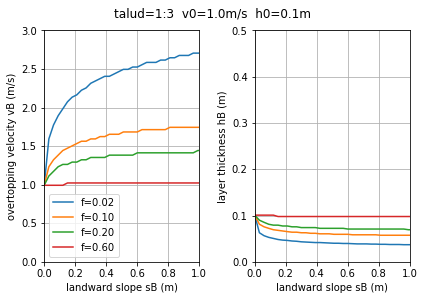

In [37]:
# FIGURE 17
talud = 3
v0 = 1.0
h0 = 0.1

fig, axes = plt.subplots(nrows=1, ncols=2)

df.loc[(talud,0.02,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(talud,0.1,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(talud,0.2,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(talud,0.6,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
axes[0].set_ylabel('overtopping velocity vB (m/s)')
axes[0].set_xlabel('landward slope sB (m)')
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,3)
axes[0].grid(True)
axes[0].legend(["f=0.02", "f=0.10","f=0.20","f=0.60"]);
#plt.show()

df.loc[(talud,0.02,v0,h0),'hB'].plot(ax=axes[1])
df.loc[(talud,0.1,v0,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
df.loc[(talud,0.2,v0,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
df.loc[(talud,0.6,v0,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
axes[1].set_ylabel('layer thickness hB (m)')
axes[1].set_xlabel('landward slope sB (m)')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,0.5)
axes[1].grid(True)

fig.suptitle('talud=1:'+str(talud)+'  v0='+str(v0)+'m/s  h0='+str(h0)+'m', y=1.03, x=0.5)
#plt.show()
fig.tight_layout()
fig.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\plots\2017-07-07//FIG17_t-'+str(talud)+'_v0-'+str(v0)+'_h0-'+str(h0)+'.png', dpi=300, bbox_inches='tight' )

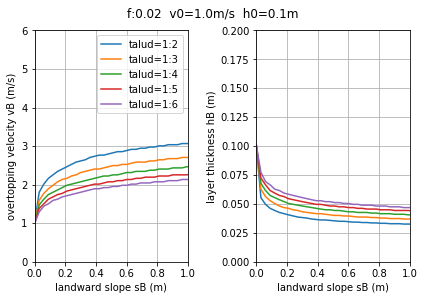

In [38]:
# FIGURE 18
f = 0.02
v0 = 1.0
h0 = 0.1

fig, axes = plt.subplots(nrows=1, ncols=2)

df.loc[(2,f,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(3,f,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(4,f,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(5,f,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
df.loc[(6,f,v0,h0),'vB'].plot(ax=axes[0]) # talud, f, v0, h0
axes[0].set_ylabel('overtopping velocity vB (m/s)')
axes[0].set_xlabel('landward slope sB (m)')
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,6)
axes[0].grid(True)
axes[0].legend(["talud=1:2", "talud=1:3","talud=1:4","talud=1:5","talud=1:6"]);
#plt.show()

df.loc[(2,f,v0,h0),'hB'].plot(ax=axes[1])
df.loc[(3,f,v0,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
df.loc[(4,f,v0,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
df.loc[(5,f,v0,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
df.loc[(6,f,v0,h0),'hB'].plot(ax=axes[1]) # talud, f, v0, h0
axes[1].set_ylabel('layer thickness hB (m)')
axes[1].set_xlabel('landward slope sB (m)')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,0.2)
axes[1].grid(True)

fig.suptitle('f:'+str(f)+'  v0='+str(v0)+'m/s  h0='+str(h0)+'m', y=1.03, x=0.5)
#plt.show()
fig.tight_layout()
fig.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\plots\2017-07-07//FIG18_f-'+str(f)+'_v0-'+str(v0)+'_h0-'+str(h0)+'.png', dpi=300, bbox_inches='tight' )